In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

In [5]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# for measurement class / file
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b686ff72b0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
# Use the session to query Measurement table and display the first 5
for row in session.query(Measurement.prcp, Measurement.date).limit(5).all():
    print(row)

(0.08, '2010-01-01')
(0.0, '2010-01-02')
(0.0, '2010-01-03')
(0.0, '2010-01-04')
(None, '2010-01-06')


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Find out the last date in the Measurement table
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# we need the data from 2016-08-03 to 2017-08-23 
# Use the session to query Measurement table and display the first 5
precipitationResults = pd.DataFrame(session.query(Measurement.prcp, Measurement.date).\
                       filter(Measurement.date > '2016-08-03').\
                        order_by(Measurement.date).all())
precipitationResults.head()

,prcp,date
0,0.04,2016-08-04
1,0.62,2016-08-04
2,0.13,2016-08-04
3,0.25,2016-08-04
4,0.77,2016-08-04


In [15]:
#plot the graph with matplotlib
# Use DataFrame.plot() in order to create a bar chart of the data

In [16]:
IndexedprecipitationResults = precipitationResults.set_index('date')
IndexedprecipitationResults.head()

,prcp
date,
2016-08-04,0.04
2016-08-04,0.62
2016-08-04,0.13
2016-08-04,0.25
2016-08-04,0.77


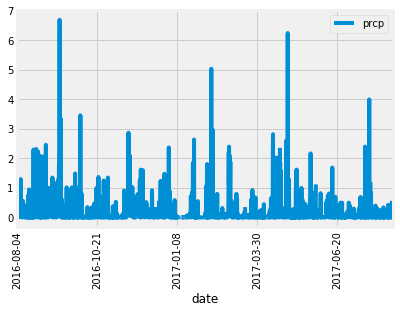

In [17]:
IndexedprecipitationResults.plot(rot = 90)

![precipitation](Images/precipitation.png)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
IndexedprecipitationResults.describe()

,prcp
count,2130.000000
mean,0.178995
std,0.458222
min,0.000000
25%,0.000000
50%,0.020000
75%,0.137500
max,6.700000


![describe](Images/describe.png)

In [19]:
# Design a query to show how many stations are available in this dataset?
# for Station class / file
# Display the row's columns and data in dictionary format
#first_row = session.query(Station).first()
#first_row.__dict__


In [20]:
stationName_df = pd.DataFrame(session.query(Station.station, Station.name).distinct().all())
stationName_df

,station,name
0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00513117,"KANEOHE 838.1, HI US"
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,USC00517948,"PEARL CITY, HI US"
4,USC00518838,"UPPER WAHIAWA 874.3, HI US"
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,USC00519281,"WAIHEE 837.5, HI US"
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
8,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [21]:
noOfStation = len(stationName_df )
noOfStation

9

In [22]:
#from measurement table

uniqueStations =len( pd.DataFrame(session.query(Measurement.station).distinct()))
print(f"The total no of stations in the database is {uniqueStations}")

The total no of stations in the database is 9


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
ActiveStation_df= pd.DataFrame(session.query(Measurement.station, Measurement.date, Measurement.tobs, Measurement.prcp).all())
ActiveStation_df.head()


,station,date,tobs,prcp
0,USC00519397,2010-01-01,65.0,0.08
1,USC00519397,2010-01-02,63.0,0.00
2,USC00519397,2010-01-03,74.0,0.00
3,USC00519397,2010-01-04,76.0,0.00
4,USC00519397,2010-01-06,73.0,NaN


In [24]:
#most active Stations
MostActiveStations_df =ActiveStation_df["station"].value_counts()
MostActiveStations_df.head()


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
Name: station, dtype: int64

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for most active station?
#df.loc[df['column_name'] == some_value]
Temp_analysisdf = pd.DataFrame(ActiveStation_df.loc[ActiveStation_df['station'] == 'USC00519281'])
Temp_analysisdf.head()

,station,date,tobs,prcp
12187,USC00519281,2010-01-01,70.0,0.15
12188,USC00519281,2010-01-02,62.0,0.00
12189,USC00519281,2010-01-03,74.0,0.00
12190,USC00519281,2010-01-04,75.0,0.00
12191,USC00519281,2010-01-05,74.0,0.00


In [26]:
#calculate the lowest temperature recorded for most active station
lowestTemp = Temp_analysisdf["tobs"].min() 
lowestTemp

54.0

In [27]:
# highest temperature recorded for most active station
highestTemp = Temp_analysisdf["tobs"].max() 
highestTemp

85.0

In [28]:
#average temperature for most active station
averageTemp = Temp_analysisdf["tobs"].mean() 
averageTemp

71.66378066378067

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [30]:
# Choose the station with the highest number of temperature observations.
TobsResults=session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
TobsResults


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# to make histogram with bins = 12
#Temp_analysisdf = pd.DataFrame(ActiveStation_df.loc[ActiveStation_df['station'] == 'USC00519281'])
#Temp_analysisdf.head()
binResults=session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').filter(Measurement.date >= '2016-08-03').all()
binResults


[(77.0),
 (77.0),
 (81.0),
 (78.0),
 (78.0),
 (81.0),
 (81.0),
 (82.0),
 (80.0),
 (76.0),
 (80.0),
 (76.0),
 (75.0),
 (74.0),
 (82.0),
 (80.0),
 (79.0),
 (81.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 

In [32]:
bin_df = pd.DataFrame(binResults)
bin_df.head()

,tobs
0,77.0
1,77.0
2,81.0
3,78.0
4,78.0


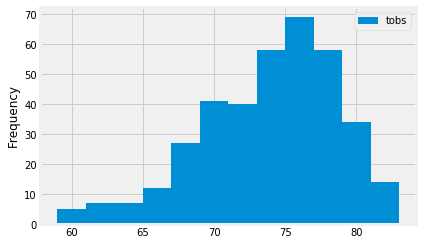

In [33]:
bin_df.plot.hist(bins=12)

![precipitation](Images/station-histogram.png)

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#the dates of the trip being 2017/08/03 -- 2107-08-15(there is no data available for 2019)


print(calc_temps('2017-08-03', '2017-08-15'))

[(70.0, 79.18867924528301, 84.0)]


In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [37]:
#[(70.0, 79.18867924528301, 84.0)]
tmax = 84.0
tmin = 70.0

C:\Users\gupta\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


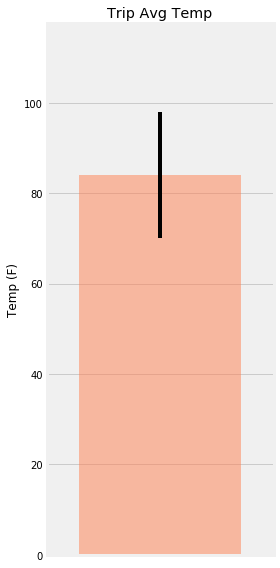

In [38]:
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin
bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
ax.margins(.2, .2)
fig.tight_layout()
fig.show()


In [39]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= '2017-08-03').\
    filter(Measurement.date <= '2017-08-15').\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)





[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.45), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.38), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.16000000000000003), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.14), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.04)]


In [40]:
#Step 2:   flask APIs

In [41]:
#Flask Setup
#This part is in the app.py file


## Optional Challenge Assignment

In [42]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("08-03")

[(70.0, 76.61111111111111, 85.0)]

In [43]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [44]:
#start Date of the trip = 08-03-2019
#end date of the trip = 08-15-2019
#using 2017 data fr the query as no data is available for 2018(as required by the prompts)

In [45]:
normasl = []


#noOfDaysOfTrip = endDate-startDate
startDate = date(2019, 8, 3)
endDate = date(2019, 8, 15)
delta = endDate - startDate


print(f"No. of days in the trip is {delta.days} days")

No. of days in the trip is 12 days


In [46]:
# create dates in range from start date to end date
ListofDates = []
def daterange(startDate, endDate):
    for n in range(int ((endDate - startDate).days)+1):
        yield startDate + timedelta(n)


for dt in daterange(startDate, endDate):
    dateList = [dt.strftime("%Y-%m-%d")]
    #print(dt.strftime("%Y-%m-%d"))
    
    ListofDates.append(dateList)


In [47]:
# this cell is not used in the queries 
    
def get_periods_range(start_dt, end_dt, freq):
    """
    Get a date range for the specified parameters.

    Parameters
    ----------
    start_dt: datetime
    end_dt: datetime
    freq: str

    Returns
    -------
    DateTimeIndex

    """
    if freq == 'minute':
        freq = 'T'

    elif freq == 'daily':
        freq = 'D'

    return pd.date_range(startDate, endDate, freq=2) 

In [48]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [49]:
dateList_df = pd.DataFrame(ListofDates)
dateList_df.rename(columns={0 : 'date'},inplace=True)
# set index as date
dateList_df=dateList_df.set_index('date')
dateList_df

""
date
2019-08-03
2019-08-04
2019-08-05
2019-08-06
2019-08-07
2019-08-08
2019-08-09
2019-08-10
2019-08-11


In [50]:
for date in ListofDates:
    daily_normals("date")
        

In [51]:
# Plot the daily normals as an area plot with `stacked=False`
